# Teknisk Tirsdag: Data Cleaning


<img src="https://imgs.xkcd.com/comics/data.png"
     align="center"
     width="20%">

Tillykke! 
Du er hermed blevet ansat som Data Scientist for en norsk virksomhed, der arbejder med at rådgive internationale fodboldklubber med hvilke spillere de skal købe.

I dag begynder I på at undersøge det danske spillermarked for potentielle kandidater til de allerstørste klubber i Europa, og som nyudnævnt data scientist er det din opgave at finde de skjulte talenter i Danmark.
Du har fået udleveret et datasæt for fodboldspillere i 2018 og du skal lave nogle analyser...

In [1]:
#PURE PYTHON!!!!
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import os
import re

# path = %pwd
# path += '/fifa-18-demo-player-dataset/CompleteDataset.csv'

# Til Windows
path = '.\\Downloads\\Fifa2018-master\\Fifa2018-master'
path += '\\fifa-18-demo-player-dataset\\CompleteDataset.csv'


### Hvordan ser vores originale datasæt ud?

__nb!__ Der kommer en advarsel når dette køres, og dette er måske en ikke dårlig ting.

In [2]:
input_data_frame = pd.DataFrame().from_csv(path=path, encoding='utf-8')
input_data_frame

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€92M,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,€64.5M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,€90.5M,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€79M,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,€77M,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


### Resning af data
Du konstatere hurtigt at dit datasæt er noget værre skrammel!
Derfor er du, som det første, nødt til at rense data for at forsøge at få noget mening ud af dine analyser.

Til dette har vi lavet følgende metoder, som henter spillerne ind fra en csv fil. 

In [3]:
def clean_raw_data(data_frame, *args):
    """
    Denne metode fjerner uønskede kolonner samt indsætter 0 på målmændendes ikke-målmænd attributter
    @input: data_frame: Det datasæt vi ønsker at fjerne unønsket kolonner i.
    @input: *args: De uønsket kolonner skrives som streng argumenter fx. 'col_x', 'col_y', '...', etc.
    @output: En dataframe hvor vi kun har de ønsket kolonner tilbage.
    """
    false_cols = [i for i in args if i not in data_frame.columns]
    if len(false_cols) != 0:
        print('The folloing column(s) are not in the Dataframe: '+', '.join(false_cols))
    return data_frame[[i for i in data_frame.columns if i not in args]]


### Opgave 0: Rens dit data!
Som den aller første opgave, vil din leder gerne have at du fjerner uønsket kolonner i dit datasæt, da de er irrelevante. Heldigvis, har nogle af dine kollegaer lavet en metode til at fjerne uønsket kolonner, så det Du skal gøre er, at identificere de kolonner, som er irelevante for denne analyse.

__HINT:__ Læs metodedokumentationen for at finde ud af hvordan man giver kolonnenavne til metoden.

In [4]:
#df = clean_raw_data(input_data_frame,'**INSÆT KOLONNENAVNE HER SOM STRENG ARGUMENTER!**')
df = clean_raw_data(input_data_frame,'Photo', 'Flag', 'Club Logo')
df

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,89,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,92,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,94,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291,88,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€92M,€355K,2143,79,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,De Gea,26,Spain,90,92,Manchester United,€64.5M,€215K,1458,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E. Hazard,26,Belgium,90,91,Chelsea,€90.5M,€295K,2096,93,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,T. Kroos,27,Germany,90,90,Real Madrid CF,€79M,€340K,2165,60,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,G. Higuaín,29,Argentina,90,90,Juventus,€77M,€275K,1961,78,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


### Hvilke datatyper har vi i vores datasæt?

Det næste vigtige apsekt i en renselsesprocess, er at undersøge hvilke datatyper som vores datasæt indeholder, og om nogle felter er blanke dvs. er None, Null eller NaN.
Til dette kan man i Pandas bruge følgende simple kommandoer.

In [5]:
g = df.columns.to_series().groupby(df.dtypes).groups
d = {key.name: list(val) for key, val in g.items()}
for navn, antal, dtype in list(zip(df.columns,df.count().tolist(), df.dtypes.tolist())):
    print('Kolonnenavn: {:20s} antal fyldte felter: {:<9.0f} datatype: {}'.format(navn, antal, dtype))

Kolonnenavn: Name                 antal fyldte felter: 17981     datatype: object
Kolonnenavn: Age                  antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Nationality          antal fyldte felter: 17981     datatype: object
Kolonnenavn: Overall              antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Potential            antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Club                 antal fyldte felter: 17733     datatype: object
Kolonnenavn: Value                antal fyldte felter: 17981     datatype: object
Kolonnenavn: Wage                 antal fyldte felter: 17981     datatype: object
Kolonnenavn: Special              antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Acceleration         antal fyldte felter: 17981     datatype: object
Kolonnenavn: Aggression           antal fyldte felter: 17981     datatype: object
Kolonnenavn: Agility              antal fyldte felter: 17981     datatype: object
Kolonnenavn: Balance

Nogle vigtige ting at tage med fra denne analyse er: 
* Vi kan med stor sikkerhed sige at der: {{len(df)}} spiller i vores datasæt, men der er kolonner som kun har {{df.CAM.count()}}.
* Vi har en masse felter som tilhører *float64* og *int64*, hvilket er godt, men følgende kolonner tilhører klassen *object*:  {{', '.join(d['object'])}} 

Dette er ikke så godt, da vi kunne være interesseret i at bruge mange af kolonnerne. Dette må vi lige rette op på. Første skridt er at identificere alle typer der er i hver enkel af *object* kolonnerne. En simple, men effektiv måde er at "undersøge" om elementet i kolonnen er et tal eller en streng.

In [6]:
def is_number_or_string(x):
    try:
        float(x)
        return 'number'
    except ValueError as va: 
        return 'string'
    
df_string_float = df.applymap(is_number_or_string)
dict_types = []
for name in d['object']:
    test_df = df_string_float.groupby(name)[name].count()
    dict_types = dict_types + list(zip([name]*2,test_df.keys(),test_df.values))

In [7]:
data_frame_types = pd.DataFrame(dict_types,columns=['name','dtypes','count'])
list_of_types = (data_frame_types
                 .pivot(index='name', columns='dtypes', values='count')
                 .reset_index()
                 .fillna(0)
                 .sort_values(['number','string'],ascending=False))
list_of_types

dtypes,name,number,string
14,GK kicking,17962.0,19.0
12,GK diving,17955.0,26.0
15,GK positioning,17955.0,26.0
13,GK handling,17954.0,27.0
16,GK reflexes,17952.0,29.0
25,Penalties,17951.0,30.0
38,Volleys,17940.0,41.0
11,Free kick accuracy,17932.0,49.0
3,Balance,17924.0,57.0
1,Aggression,17913.0,68.0


Ok - rigtig mange af de kolonner som repræsentere de fysiske egenskaber har skrald i sig. Det må vi lige undersøge nærmere


In [8]:
def contains_not_number(x):
    matched = re.findall(r'[^\d\. ]+',str(x),re.IGNORECASE)
    if len(matched) != 0:
        return x

In [9]:
mixed_type_cols = list(list_of_types.loc[list_of_types['number'] != 0.0].name)
for col in mixed_type_cols:
     print((col, list(filter(lambda x: contains_not_number(x) ,df[col].unique()))))

('GK kicking', ['73-1', '68-2', '67+4', '65+1', '61-3', '63-7', '59-1', '60+2', '62+2', '60-1', '61+2', '60+1', '54-1', '65+4', '55+2', '68+8', '57+2', '55-1', '56+4'])
('GK diving', ['81-2', '76+1', '76-1', '75+1', '78+3', '72-1', '75+4', '70-2', '73+2', '71-2', '65+2', '68-1', '67+2', '63+2', '62-1', '66+1', '63+1', '64-3', '62+1', '64+5', '54-3', '56+2', '55+5', '55+4'])
('GK positioning', ['71-2', '69+1', '66-2', '69+2', '64+1', '65+4', '60+3', '66-1', '65+1', '63-1', '70+2', '62-1', '64+2', '62+4', '61-1', '60+1', '58+2', '58+4', '59+2', '51+3', '45-1'])
('GK handling', ['78-2', '72-1', '78-1', '67-1', '69+1', '75-1', '73+1', '66+3', '65+1', '63+2', '64+3', '66+2', '63-1', '65+3', '59+3', '58-1', '60+2', '60-1', '57+2', '52+2', '56+4', '53-1', '47-1', '52+3', '55+2'])
('GK reflexes', ['86-2', '83-1', '85-1', '79+1', '74+1', '81-1', '83+3', '78+2', '73-1', '75+2', '70+1', '70-1', '69+2', '67+2', '62+3', '68+2', '65+1', '65-3', '65-1', '61-3', '67+8', '60+1', '55+5', '56-4', '53+3',

Ok vores mærkelig værdier skyldes faktisk, at man i Fifa har tillægs-værdier på nogle af attributterne. For nemhedens skylds fjerner vi blot disse ekstra elementer. En anden fremgangsmetode kunne være at fjerne rækken med det "dårlige" data i. Dette gælder dog kun for de fysiske attributer. 

In [10]:
def convert_columns(data_frame, mixed_cols):
    for col in mixed_cols:
        try:
            data_frame[col] = data_frame[col].str[:2].astype(np.float64)
        except Exception as e:
            print(e)
    return data_frame

In [11]:
df = convert_columns(df,mixed_type_cols[:-1])
df.dtypes

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Name                    object
Age                      int64
Nationality             object
Overall                  int64
Potential                int64
Club                    object
Value                   object
Wage                    object
Special                  int64
Acceleration           float64
Aggression             float64
Agility                float64
Balance                float64
Ball control           float64
Composure              float64
Crossing               float64
Curve                  float64
Dribbling              float64
Finishing              float64
Free kick accuracy     float64
GK diving              float64
GK handling            float64
GK kicking             float64
GK positioning         float64
GK reflexes            float64
Heading accuracy       float64
Interceptions          float64
Jumping                float64
Long passing           float64
Long shots             float64
                        ...   
Vision                 float64
Volleys 

Fantastisk! Nu har du fået converteret de fysiske attributter. Du bemærket tidligere, at klubberne også var markeret til at have blandet typer. Dette kan undersøges ret let:

In [12]:
df['Club'].sort_values(ascending=False, na_position='first')

162                       NaN
167                       NaN
274                       NaN
472                       NaN
488                       NaN
658                       NaN
925                       NaN
944                       NaN
1019                      NaN
1273                      NaN
1351                      NaN
1402                      NaN
1549                      NaN
1597                      NaN
1802                      NaN
1819                      NaN
1826                      NaN
1888                      NaN
1899                      NaN
2000                      NaN
2090                      NaN
2241                      NaN
2246                      NaN
2281                      NaN
2350                      NaN
2424                      NaN
2483                      NaN
2518                      NaN
2552                      NaN
2553                      NaN
                 ...         
13392        1. FC Heidenheim
7396         1. FC Heidenheim
12298     

Din mavefornemmelse virkede! Der er nogle af spillerne som ikke har klubber, dvs. de er arbejdsløse. Dette er ikke nogen katastrofe. Vi kan enten fjerne dem (de må simpelthen være så dårlige at ingen gider ansætte dem), eller også kan vi lade dem være i (de fortjener en chance). I dette forsøg vælges det sidste udvalg.

Du bemærket også at Wage (Løn) og Value (Værdi) er *object* typer. Hvis vi undersøger disse kolonner nærmere ser vi det skyldes dels, at vi regner i € (Euro) og at dataindsamlerne har været så venlig - at erstatte antallet af 0'er med hhv. K for 000 og M 000000. 

In [13]:
df[['Wage','Value']]

,Wage,Value
0,€565K,€95.5M
1,€565K,€105M
2,€280K,€123M
3,€510K,€97M
4,€230K,€61M
5,€355K,€92M
6,€215K,€64.5M
7,€295K,€90.5M
8,€340K,€79M
9,€275K,€77M


In [14]:
def parse_of_wage(val):
    val = re.sub('€', '', val)
    valdict = {'M': 1000000, 'K': 1000, '': 0}
    try:
        splitter = re.findall('(\d*\.?\d)([MK]?)', val)[0]
        return float(splitter[0])*valdict[splitter[1]]
    except IndexError as e:
        print(splitter)

In [15]:
df['Value'] = df['Value'].apply(lambda x: parse_of_wage(x))
df['Wage'] = df['Wage'].apply(lambda x: parse_of_wage(x))
df = df.fillna(value=0.0)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
g = df.columns.to_series().groupby(df.dtypes).groups
d = {key.name: list(val) for key, val in g.items()}
for key, val in df.dtypes.items():
    print('Variablenavn: {:20s} Variabletype: {}'.format(key,val))

Variablenavn: Name                 Variabletype: object
Variablenavn: Age                  Variabletype: int64
Variablenavn: Nationality          Variabletype: object
Variablenavn: Overall              Variabletype: int64
Variablenavn: Potential            Variabletype: int64
Variablenavn: Club                 Variabletype: object
Variablenavn: Value                Variabletype: float64
Variablenavn: Wage                 Variabletype: float64
Variablenavn: Special              Variabletype: int64
Variablenavn: Acceleration         Variabletype: float64
Variablenavn: Aggression           Variabletype: float64
Variablenavn: Agility              Variabletype: float64
Variablenavn: Balance              Variabletype: float64
Variablenavn: Ball control         Variabletype: float64
Variablenavn: Composure            Variabletype: float64
Variablenavn: Crossing             Variabletype: float64
Variablenavn: Curve                Variabletype: float64
Variablenavn: Dribbling            Variabl

Fedt! nu kan du konstatere at de eneste *object*-type variable er: {{', '.join(d['object'][:-1])}} og {{d['object'][-1]}}

### Indførsel af labels i datasættet
For at vi kan kende forskel på hvilke spillere, der kan være kandidater, er vi nødt til at tildele alle spillere en *label*. Da vores klientel er topklubber i Europa vælger vi at tage udgangspunkt i de klubbers spillere, som skal udgøre lablen: 1. For at vores model kan kende forskel på disse spillere og andre spillere, er modellen nødt til at have spillere, som ikke har noget med disse klubber at gøre. Disse spillere vil få label-værdien: 0.

Dine kunder er: 
Barcelona, Real Madrid, Juventus, AC Milan, Bayern München, Arsenal og Manchester City.

### Opgave 1: Vælg topklubber
Som nørdet data scientist, vil du dog sikre dig at du får det bedste resultat, og derfor tænker du at vi er nødt til at finde en mere generel population af klubber, som kan klassificeres som topklub. 
Vi starter med at kigge på hvordan de enkelte klubbers overordnet præstation, givet ved *Overall* forholder sig. 

Din opgave er
* Leg lidt med nedenstående graf og vælg et passende antal *bins* (spande på dansk), så vi får et retvisende billedet af hvilke klubber, der er *toppen af poppen* i Europa.
* På baggrund af din analyse skal du vælge den værdi, som skiller topklubberne fra alle de andre.

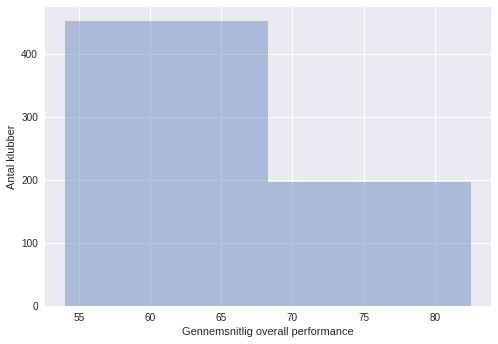

In [17]:
import matplotlib.pyplot as plt
import seaborn as sb

antal_bins = 2###JEG SKAL ÆNDRES TIL NOGET FORNUFTIGT! ###

overall_performance = (df
                       .groupby('Club',as_index=False)['Overall'].mean()
                       .sort_values(by='Overall',ascending = False))

ax = sb.distplot(overall_performance['Overall'], bins= antal_bins ,kde=False)
ax.set_xlabel('Gennemsnitlig overall performance')
ax.set_ylabel('Antal klubber')
plt.show()

In [26]:
top_klub_ratio = None### Fjern NONE og UDFYLD MIG ###

top_clubs = overall_performance[overall_performance['Overall'] >= top_klub_ratio]['Club']

Sådan! Det eneste vi mangler nu, er at lave de egentlige datasæt vi skal bruge til træningen af vores Machine Learning algoritme.

Vi laver 3 sæt hhv.:
* __Danskersættet__. Et datasæt med alle danske spillere. Som vi skal bruge til sidst, for at lave vores anbefalinger til kunden.
* __topklub_set__. Et datasæt kun med topklubberne
* __overall_set__. Et datasæt med de udvalgte topklubber og et udvalg af ikke topklubbet sat sammen til ét. Dette er vores træningssæt.


In [25]:
from sklearn.model_selection import train_test_split

dansker_set = df[df['Nationality'] == 'Denmark']
topklub_set = df[df['Club'].isin(top_clubs)]
ikke_topklub_set = df[(~df['Club'].isin(top_clubs)) & (df['Nationality'] != 'Denmark')].sample(len(topklub_set))
overall_set = pd.concat([topklub_set, ikke_topklub_set])

print('Træningsæt størrelse: {}'.format(len(overall_set)))

Træningsæt størrelse: 1272


Du er nået til vejs ende. Næste sæt øvelser er om Supervised learning. 